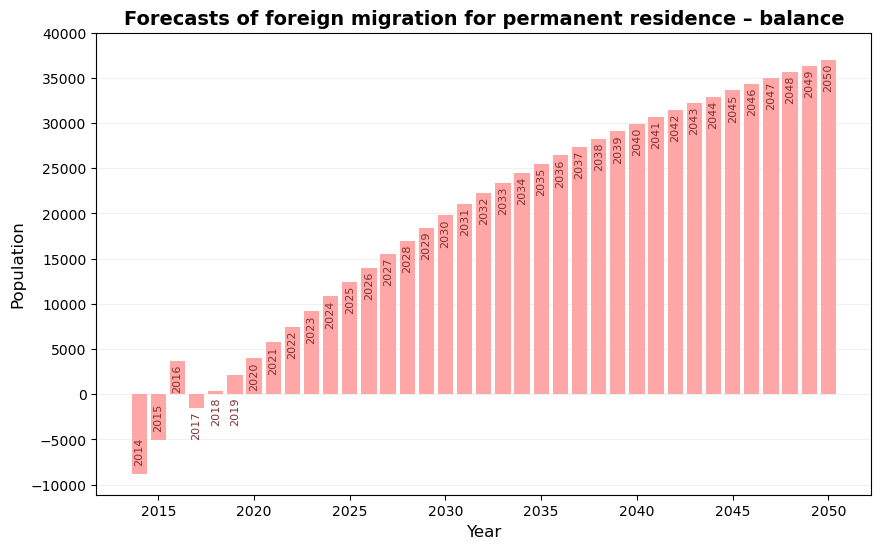

In [1]:
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

p = "./files/Ludność w Polsce - prognozy.xlsx"
data = pd.read_excel(p, sheet_name='ruch naturalny i wędrówkowy')

column_name = 'Migracje zagraniczne na pobyt stały – Saldo'  
column_data = data[column_name].tolist()
rok = data['Rok'].unique()

plt.figure(figsize=(10,6))
 
bars = plt.bar(data['Rok'], column_data, color='#FFA6A6', zorder=2)  
#plt.xticks(rok, rotation=45)
plt.yticks(range(-10000, 43001, 5000)) 
plt.title('Forecasts of foreign migration for permanent residence – balance', fontsize = 14, fontweight = 'bold') 
plt.ylabel('Population',fontsize = 12)
plt.xlabel('Year', fontsize = 12) 

plt.grid(which='major', axis = 'y', linewidth='0.4', color='#E5E5E5', zorder=1)

for bar, value in zip(bars, rok):
    height = bar.get_height()
    if height <= 2500:
        if height <= -5000:
            height = height+1000
        elif height <= 0:
            height = height -3500
        elif height <= 2500:
            height = -3500   
    else:
        height = bar.get_height() - 3500
    plt.text(bar.get_x() + bar.get_width() / 2, height , str(value), ha='center', va='bottom', 
             color = '#803030', rotation=90, fontsize = 8)

plt.show()

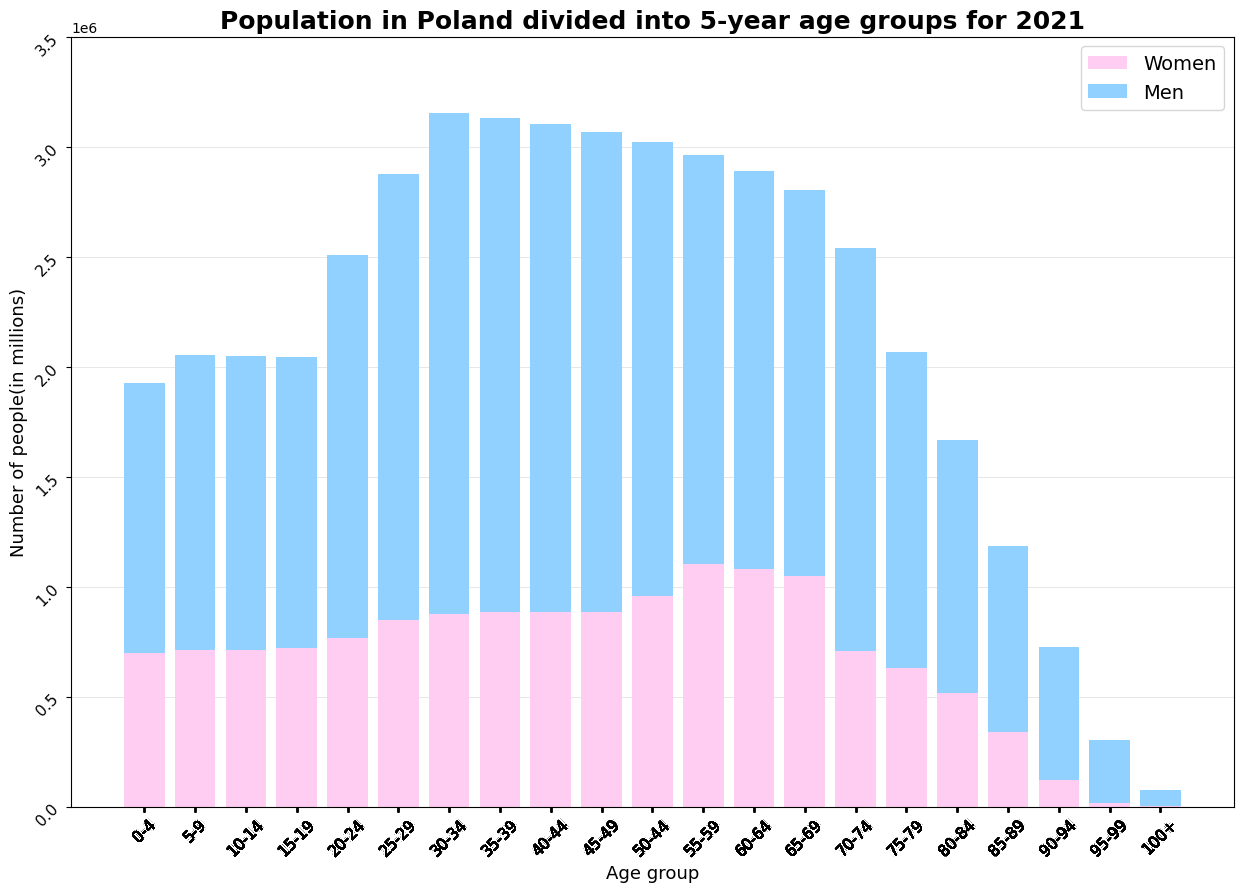

In [2]:
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

p = "./files/Ludność w Polsce - prognozy.xlsx"
df = pd.read_excel(p, sheet_name='pięcioletnie grupy wieku')
df_2021 = df.query("Rok == 2021")

df_woman = df['Kobiety']
df_men = df['Mężczyźni']
df_age_groups = df['Wiek']
df_general = df['Ogółem']

plt.figure(figsize=(15,10))

plt.title("Population in Poland divided into 5-year age groups for 2021", fontsize=18, fontweight='bold')

plt.bar(df_age_groups, df_woman, color='#FFCDF1',label="Women", zorder=2)
plt.bar(df_age_groups, df_men, color='#91D1FF', bottom=df_woman, label="Men", zorder=2)
 
plt.xticks(df_age_groups, rotation=45, fontweight='light', fontsize=11)
plt.yticks(range(1,4000001,500000), rotation=45, fontsize=11)
#ticklabel_format

plt.grid(which='major',axis='y', linestyle='-', linewidth='0.4',color='#D5D5D5', zorder=1)

plt.xlabel('Age group', fontsize=13)
plt.ylabel('Number of people(in millions)', fontsize=13)
 
plt.legend(fontsize=14)

plt.show()

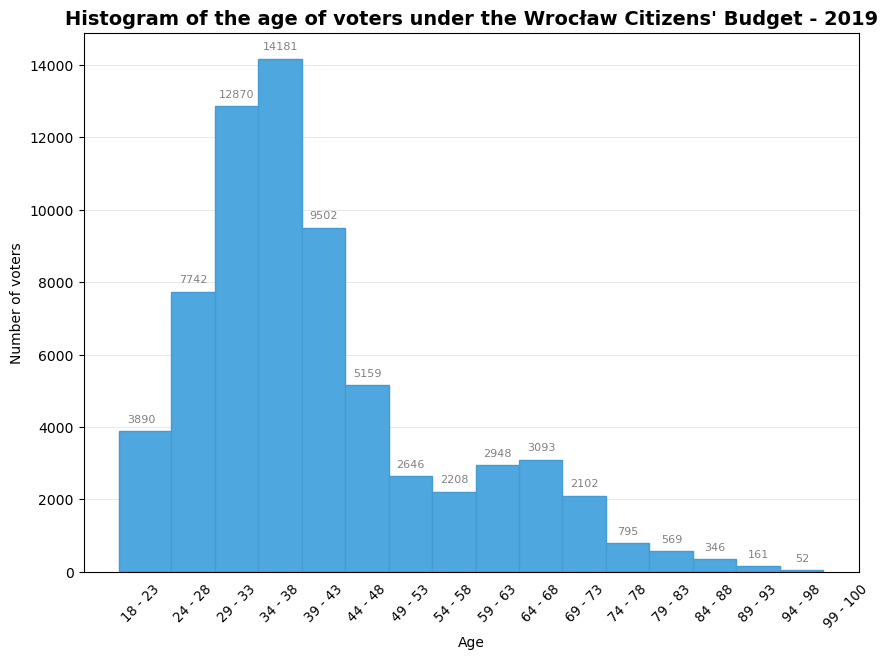

In [3]:
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

p = "./files/wbo_lista_glosow_2019.csv"
df = pd.read_csv( p, sep=';', decimal='.')

x_axis=["18 - 23"]
for i in range (24, 101, 5):
    x_axis.append(f"{i} - {i+4}") if i < 99 else x_axis.append(f"{i} - 100")

bins = [18, 24] + list(range(29, 101, 5))
bins2 = [x + 2.5 for x in bins]

plt.figure(figsize=(10,7))
counts, bin_edges, patches = plt.hist(df['Wiek'], bins=bins, color = '#4EA7DE', edgecolor='#479BD0', zorder=2)

plt.title("Histogram of the age of voters under the Wrocław Citizens' Budget - 2019", 
          fontweight='bold', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Number of voters')
plt.xticks(ticks=bins2, labels=x_axis, fontsize = 9.5, rotation=45)
plt.yticks(ticks=range(0,15000,2000))
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.grid(which='major',axis='y', linestyle='-', linewidth='0.4',color='#D5D5D5', zorder=1)

for count, bin_edge, patch in zip(counts, bin_edges, patches):
    height = patch.get_height()
    plt.annotate(f"{int(height)}", (bin_edge, height),xytext=(16,5), fontsize = 8, textcoords='offset points', 
                 color = "#808080",ha='center', va='bottom')

plt.show()

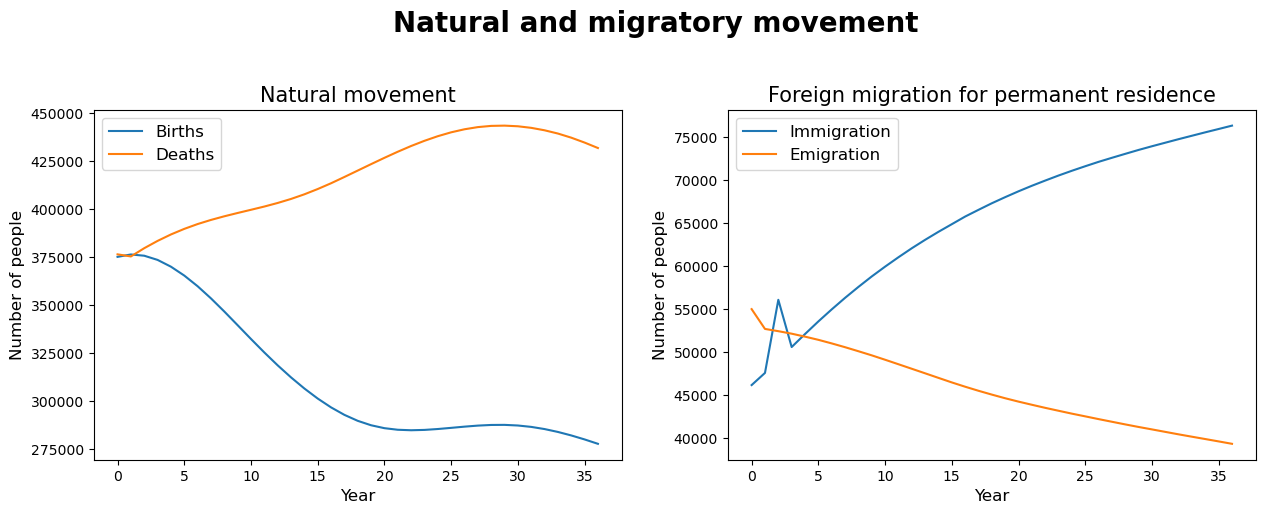

In [4]:
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

p = "./files/Ludność w Polsce - prognozy.xlsx"
df = pd.read_excel(p, sheet_name='ruch naturalny i wędrówkowy')

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df['Ruch naturalny – Urodzenia'], label='Births')
plt.plot(df['Ruch naturalny – Zgony'], label='Deaths')
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Number of people", fontsize= 12)
plt.legend(['Births', 'Deaths'], fontsize= 12)
plt.title("Natural movement", fontsize= 15)
 
plt.subplot(2,2,2)
plt.plot(df['Migracje zagraniczne na pobyt stały – Imigracja'], label='Immigration')
plt.plot(df['Migracje zagraniczne na pobyt stały – Emigracja'], label='Emigration ')
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Number of people", fontsize= 12)
plt.legend(['Immigration', 'Emigration'], fontsize= 12)
plt.title("Foreign migration for permanent residence", fontsize= 15)

plt.suptitle("Natural and migratory movement", fontsize= 20, fontweight='bold') 
plt.show()

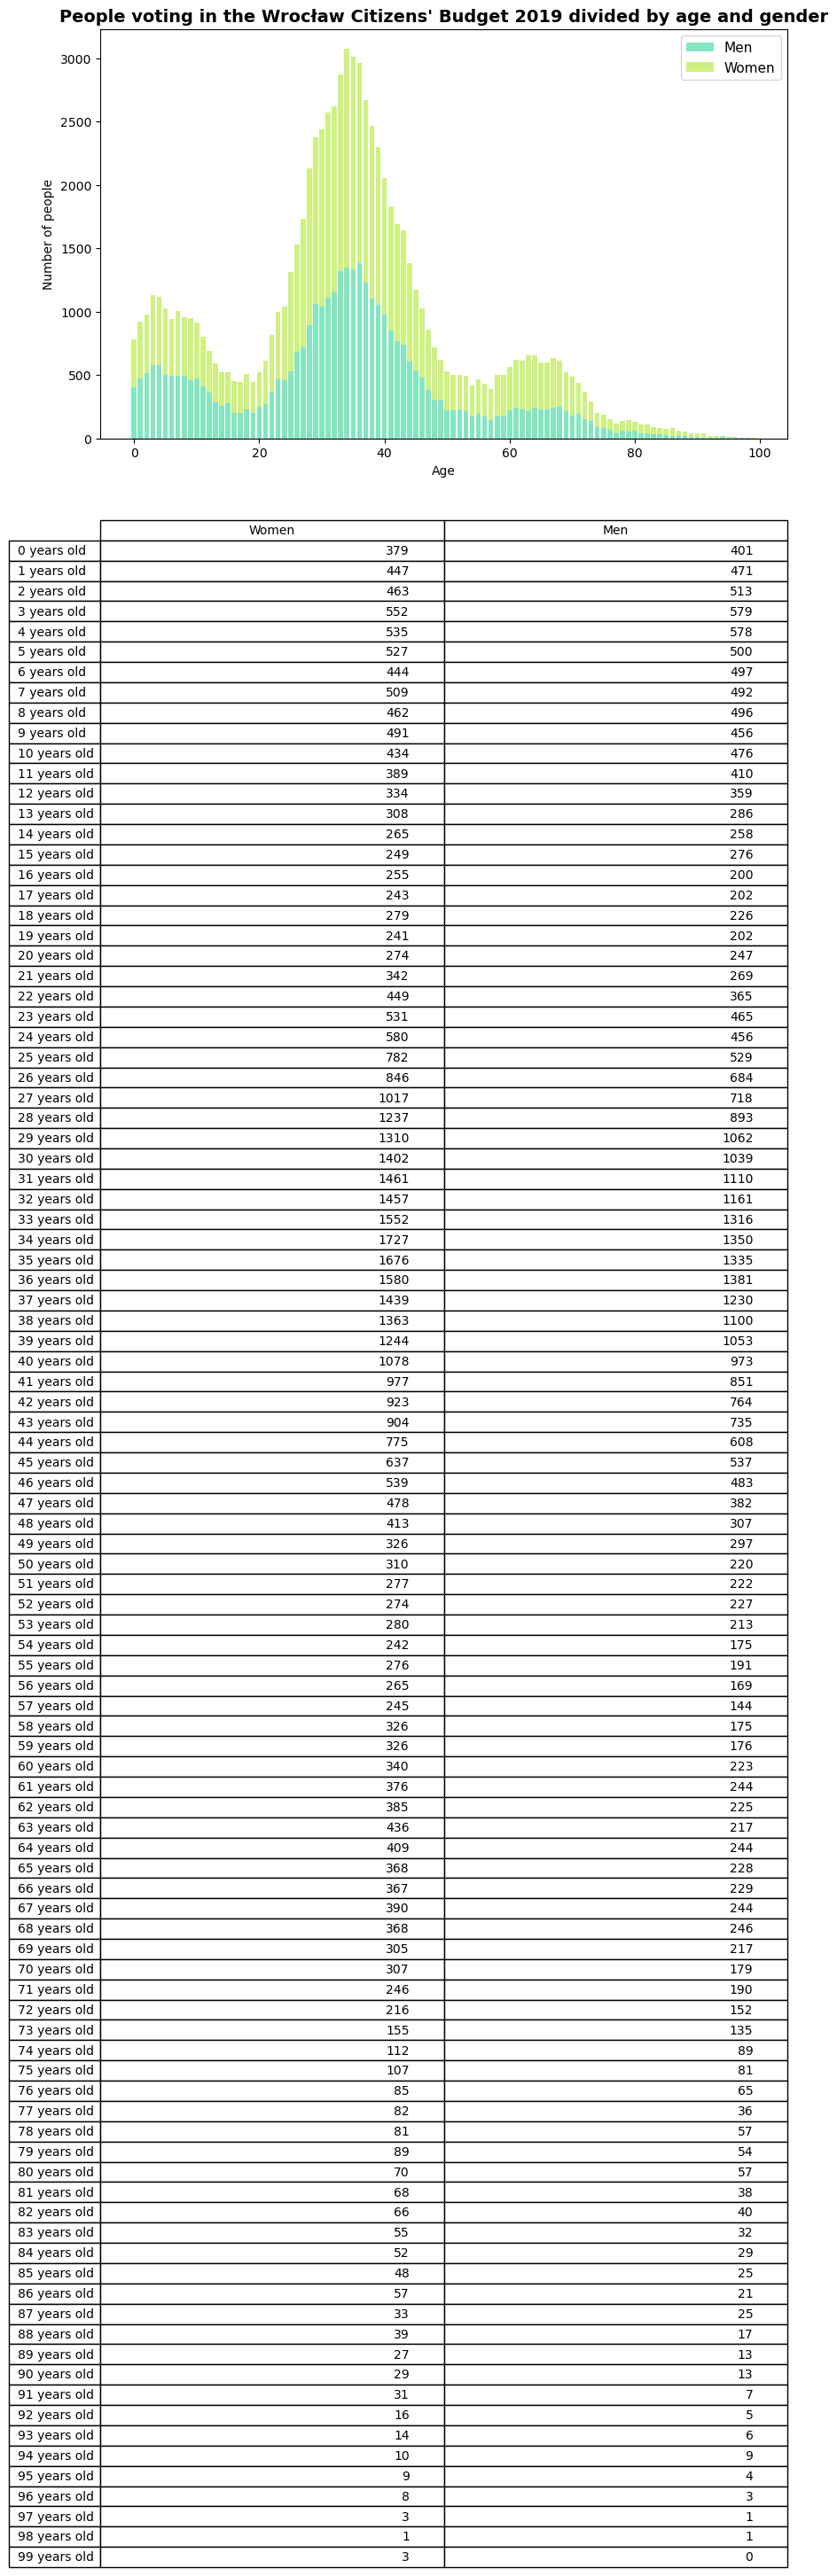

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

p = "./files/wbo_lista_glosow_2019.csv"
df = pd.read_csv( p, sep=';', decimal='.')

m_100 = df[(df['Plec'] == 'M') & (df['Wiek'] < 100)].groupby(by='Wiek').size().reindex(range(0,100), fill_value=0)
w_100= df[(df['Plec'] == 'K') & (df['Wiek'] < 100)].groupby(by='Wiek').size().reindex(range(0,100), fill_value=0)

plt.figure(figsize=(10,6))

plt.bar(m_100.index, m_100, color='#84E5C1')
plt.bar(m_100.index, w_100, bottom=m_100, color='#CEF181')

plt.title("People voting in the Wrocław Citizens' Budget 2019 divided by age and gender", fontweight = 'bold',fontsize= 14)

plt.xlabel('Age') 
plt.ylabel('Number of people')
plt.legend(['Men', 'Women'], fontsize= 11)

cells = []
cellLabels = []
for i in range(0,100):
    cells.append([f'{w_100[i]}', f'{m_100[i]}'])
    cellLabels.append(f'{i} years old')

plt.table(cellText=cells, rowLabels=cellLabels, colLabels=['Women', 'Men'],bbox=[0.0, -5.2, 1, 5]) 
plt.show()

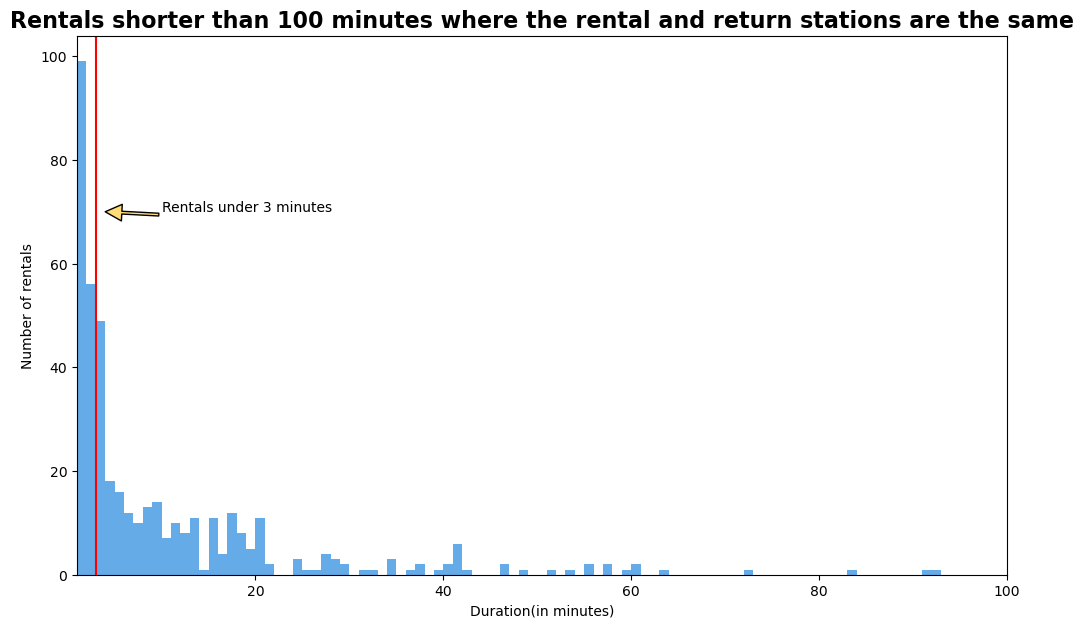

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

p = "./files/Historia_przejazdow.csv"
df = pd.read_csv(p, sep=',', decimal='.', encoding = "windows-1250")
df.head(1)

rentals_100 = df[(df['Stacja wynajmu'] == df['Stacja zwrotu']) & (df['Czas trwania'] < 100)]

plt.figure(figsize=(12,7))
 
x = plt.hist(rentals_100['Czas trwania'],bins=range(1,101,1),color='#64ABE7')
plt.xlabel('Duration(in minutes)') 
plt.ylabel('Number of rentals')
plt.title('Rentals shorter than 100 minutes where the rental and return stations are the same', fontsize = 16,fontweight = 'bold')

plt.axvline(3, color='red')
plt.xlim(1, 100)
plt.annotate('Rentals under 3 minutes', xy=(4,70),xytext=(10,70),arrowprops=dict(facecolor='#FFDC77',width= 2), rotation=0)

plt.show()